# **Installing Dependencies**

In [ ]:
!pip install neattext
!pip install vadersentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


# **Necessary Dependencies**

In [ ]:
import neattext as nt  #Package for text cleaning
import numpy as np     #package for arrays handling
import pandas as pd    #package for data analysis
# packages for data visualizations
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# **Reading The Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vaccination_all_tweets.csv to vaccination_all_tweets.csv


# **Converting the Data Into DataFrame**

In [ ]:
import io
tweets_df= pd.read_csv(io.BytesIO(uploaded['vaccination_all_tweets.csv']))

### **Shape of the Data**

In [ ]:
tweets_df.shape

(228207, 16)

### **Checking Null Value**

In [ ]:
tweets_df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

### **Removing Columns that are Un-Necessary and with Most Null Values**

In [ ]:
# tweets_df=tweets_df.drop(['user_description','hashtags'],axis=1)

# **Tweets by Month/Year**

In [ ]:
tweets_df['date'] = pd.to_datetime(tweets_df.date)

In [ ]:
tweets_df['month/year'] = pd.DatetimeIndex(tweets_df.date).month.astype(str) + ' / ' + pd.DatetimeIndex(tweets_df.date).year.astype(str)

In [ ]:
tweets_by_date= tweets_df.groupby('month/year', sort=False)['text'].size().reset_index(name='Number of Tweets')
tweets_by_date

,month/year,Number of Tweets
0,12 / 2020,1980
1,1 / 2021,3029
2,2 / 2021,10524
3,3 / 2021,27566
4,4 / 2021,26619
5,5 / 2021,18701
6,6 / 2021,35504
7,7 / 2021,28053
8,8 / 2021,28625
9,9 / 2021,16810


In [ ]:
tweets_by_date= tweets_df.groupby('month/year', sort=False)['hashtags'].size().reset_index(name='Number of Tweets')
tweets_by_date

,month/year,Number of Tweets
0,12 / 2020,1980
1,1 / 2021,3029
2,2 / 2021,10524
3,3 / 2021,27566
4,4 / 2021,26619
5,5 / 2021,18701
6,6 / 2021,35504
7,7 / 2021,28053
8,8 / 2021,28625
9,9 / 2021,16810


In [ ]:
# tweets_df['hashtags']=tweets_df['hashtags'].apply(lambda x:str(x))

In [ ]:
dummy=tweets_df

In [ ]:
dummy=dummy.dropna(axis=0)

In [ ]:
dummy['hashtags']=dummy['hashtags'].apply(lambda x:nt.remove_special_characters(x))
dummy['hashtags']=dummy['hashtags'].apply(lambda x:x.lower())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dummy['hashtags']

0                                            pfizerbiontech
2         coronavirus sputnikv astrazeneca pfizerbiontec...
6                                               vaccination
9         covidvaccine covid19vaccine us pakustv nyc hea...
10                                   pfizerbiontech vaccine
                                ...                        
228202              urban bengaluru covidvaccine covishield
228203               bbmp bengaluru covidvaccine covishield
228204              urban bengaluru covidvaccine covishield
228205                                             sputnikv
228206              urban bengaluru covidvaccine covishield
Name: hashtags, Length: 116057, dtype: object

In [ ]:
hashtags_each_month=dummy.groupby('month/year')['hashtags'].apply(' '.join).reset_index(name='Monthly Hashtags')

In [ ]:
import re

In [ ]:
hash_list=[]

In [ ]:
from collections import Counter

In [ ]:
def processing(hashtags):
  hash_list=[]
  hashtags=hashtags.split(" ")
  for hash in hashtags:
     hash_list.append(hash)
  count=Counter(hash_list)
  
  return count
  # print(count)


In [ ]:
# hashtags_each_month['l']=hashtags_each_month['l'].apply(lambda x:nt.remove_custom_words)

In [ ]:
hashtags_each_month['hashtags_dict']=hashtags_each_month['Monthly Hashtags'].apply(lambda x:processing(x))

In [ ]:
def make_bar_plot(x, y, title=None, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [ ]:
import warnings

In [ ]:
top_hashtags_list=['moderna','covid19','sputnikv','vaccine','covidvaccine','sinovac','pfizer','covaxin','covishield','bengaluru']

In [ ]:
temp_list=[]
m_list=[]

In [ ]:
# plt.rcParams["figure.figsize"] = (25,10)

# **Hashtags Trend By Each Month**

In [ ]:
# axes = plt.gca()
def top_hashtags_cnt(hash_dict):
  temp_list=[]
  # cnt+=1
  df=pd.DataFrame({'H':hash_dict.keys(),'C':hash_dict.values()})
  df=df.sort_values(by='C',ascending=False)
  for t_hash in top_hashtags_list:
    if  t_hash in df['H'][0:10].tolist():
      # df.query('H == t_hash')
      # # print(d)

      temp_list.append(df.loc[df['H']==t_hash]['C'].values[0])
    else:
      temp_list.append(0)
  m_list.append(temp_list)

  # temp_df=pd.DataFrame(temp_list)
        # print(t_hash)
  # plt.figure(figsize=(15, 5))
  # plt.plot("H","C",data=df[0:5])
  # # df[0:5].plot(kind='line', x='H', y='C', ax=axes);
  # # plt.figure(figsize=(15, 5))
  # plt.title("Hashtags ?Trend By Month")
  
  # warnings.filterwarnings("ignore")
  # print(" ")
  # pd.DataFrame(temp_list)
  # for i in temp_list:
  #   print(str(i)+str("a"))


  # print(len(temp_list))

In [ ]:
hashtags_each_month['hashtags_dict'].apply(lambda x:top_hashtags_cnt(x))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
Name: hashtags_dict, dtype: object

In [ ]:
top_hashtags_list=['moderna','covid19','sputnikv','vaccine','covidvaccine','sinovac','pfizer','covaxin','covishield','bengaluru']

In [ ]:
temp_df=pd.DataFrame(m_list)
temp_df.columns=top_hashtags_list

In [ ]:
temp_df

,moderna,covid19,sputnikv,vaccine,covidvaccine,sinovac,pfizer,covaxin,covishield,bengaluru
0,86,352,0,203,175,0,130,0,0,0
1,2470,969,0,519,1558,0,577,2697,1460,1383
2,2361,961,0,432,1313,0,654,3456,1192,1133
3,49,293,0,170,142,0,77,0,0,0
4,1707,1217,951,932,322,451,485,449,0,0
5,4587,2646,1791,1689,941,781,832,2995,0,0
6,5866,2395,2500,1338,692,658,998,2622,630,0
7,2767,1545,1813,963,0,637,609,2812,475,0
8,3974,2053,1309,1173,677,1675,1174,5235,988,0
9,2553,1168,879,0,1366,1080,816,1193,1353,1148


In [ ]:
new_df=pd.concat([hashtags_each_month['month/year'],temp_df],axis=1)

# **Top Hahtags Trend**

In [ ]:
px.line(new_df, x='month/year', y=top_hashtags_list,  title='Top Hashtags Trend')

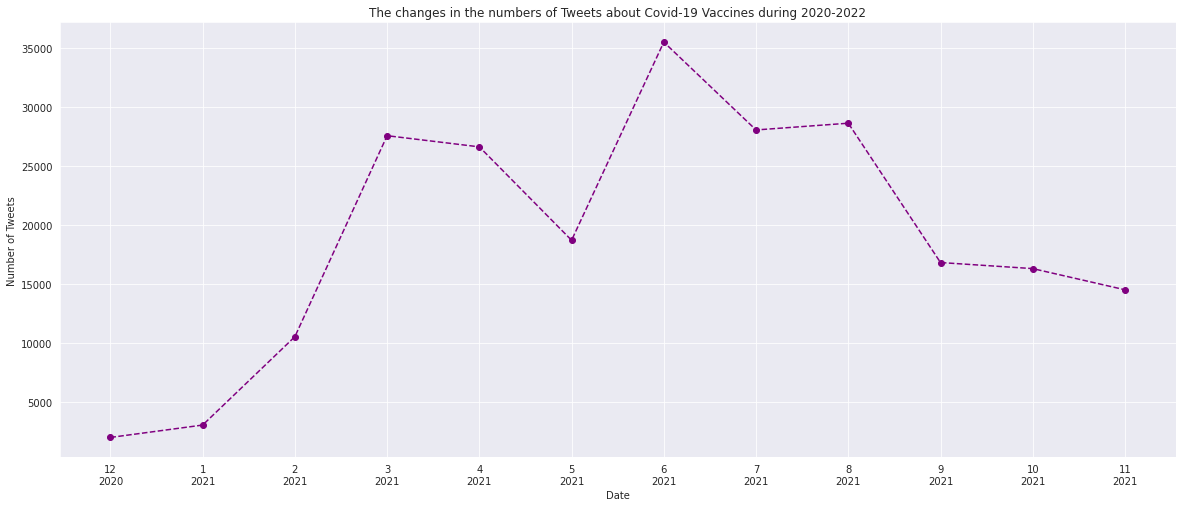

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(tweets_by_date['month/year'].str.replace(' / ', '\n'),tweets_by_date['Number of Tweets'],'o--r',color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('The changes in the numbers of Tweets about Covid-19 Vaccines during 2020-2022');

In [ ]:
def make_plots(feature, title="", limited=False, n=10):
    # print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    # print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    # print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

# **Top 5 User By Number of Tweets**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129417 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 129417 missing from current font.



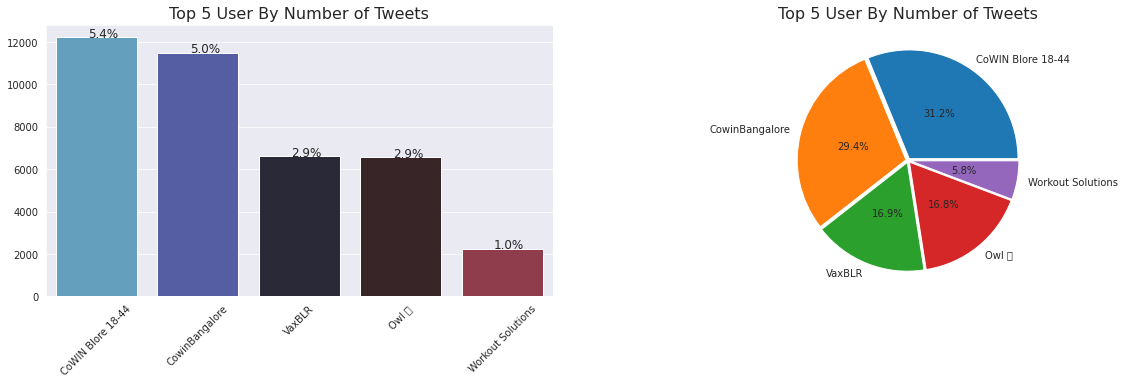

In [ ]:
make_plots(tweets_df['user_name'],"Top 5 User By Number of Tweets",True,5)

# **Top-5 : How Many Times a Tweet Retweeted**

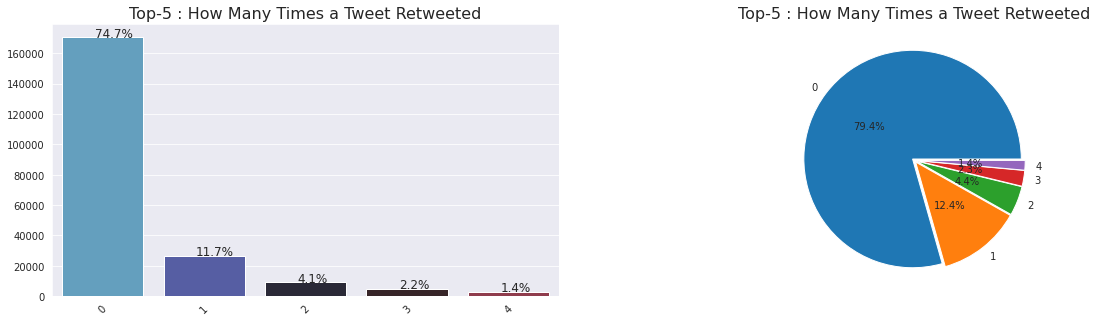

In [ ]:
make_plots(tweets_df['retweets'],"Top-5 : How Many Times a Tweet Retweeted",True,5)

# **Tweet Sources Top-10**

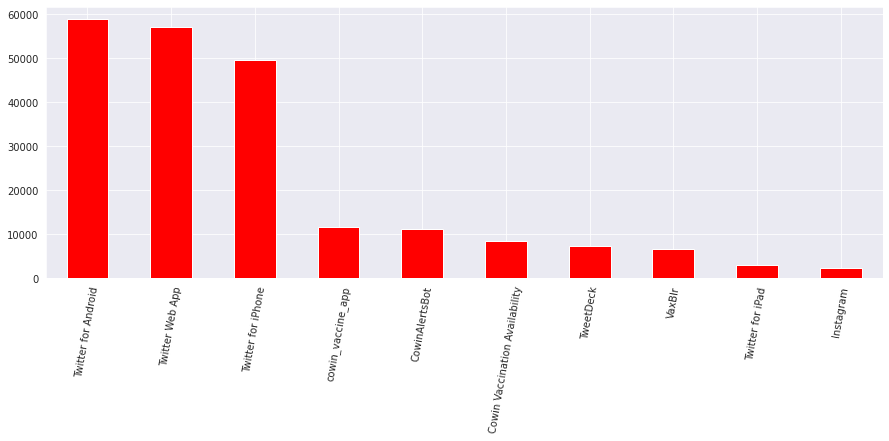

In [ ]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,5))
tweets_df['source'].value_counts().nlargest(10).plot(kind='bar',color='red')
plt.xticks(rotation=80)
plt.show()

# **Locations Top-20**

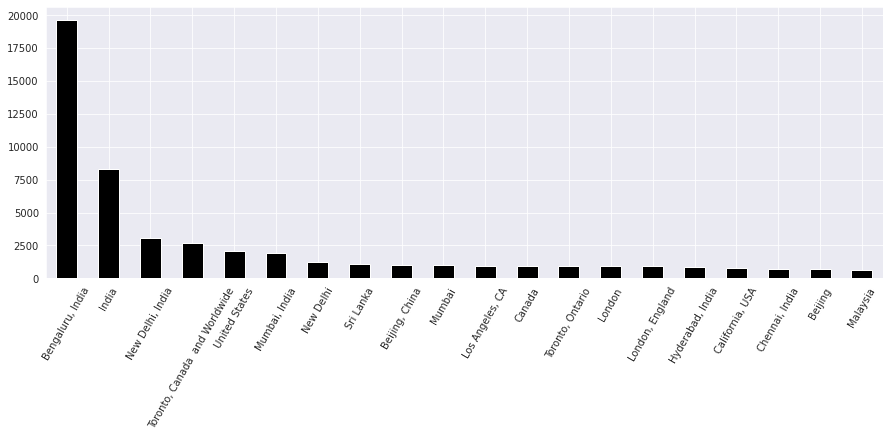

In [ ]:
plt.figure(figsize=(15,5))
tweets_df['user_location'].value_counts().nlargest(20).plot(kind='bar',color="black")
plt.xticks(rotation=60)
plt.show()

In [ ]:
tweets_df['day of week'] = tweets_df['date'].dt.dayofweek
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month
tweets_df['day'] = tweets_df['date'].dt.day
tweets_df['dayofweek'] = tweets_df['date'].dt.dayofweek
tweets_df['hour'] = tweets_df['date'].dt.hour
tweets_df['minute'] = tweets_df['date'].dt.minute
tweets_df['dayofyear'] = tweets_df['date'].dt.dayofyear
tweets_df['date_only'] = tweets_df['date'].dt.date

In [ ]:
def hourly_tweets(feature, title,size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(tweets_df))
    if ordered:
        plot = sns.countplot(tweets_df[feature], order = tweets_df[feature].value_counts().index[:20], palette='Set3')
    else:
        plot = sns.countplot(tweets_df[feature], palette='Set1')
    plot.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

# **Hourly Tweets Density**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



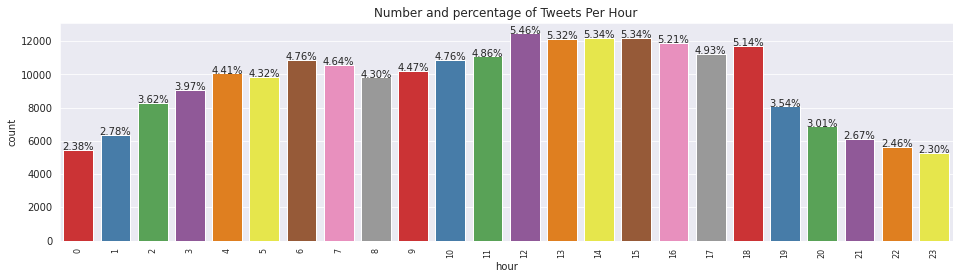

In [ ]:
hourly_tweets("hour", "Tweets Per Hour",size=4, ordered=False)

In [ ]:
def day_of_week(feature, title,size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(tweets_df))
    if ordered:
        plot = sns.countplot(tweets_df[feature], order = tweets_df[feature].value_counts().index[:20], palette='Set3')
    else:
        plot = sns.countplot(tweets_df[feature], palette='Set1')
    plot.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

# **Tweets By Days of Week -- Sunday=0**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



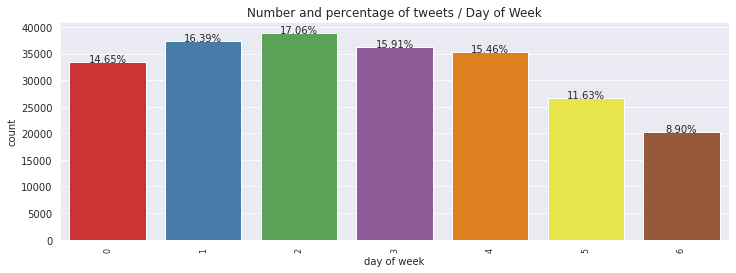

In [ ]:
day_of_week("day of week", "tweets / Day of Week",size=3, ordered=False)

# **Verified vs Un-verified Users**

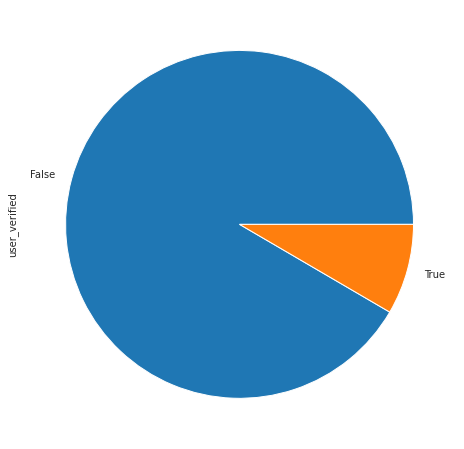

In [ ]:
plt.figure(figsize=(8,8))
tweets_df['user_verified'].value_counts().plot.pie()
plt.show()

# **Finding Hashtags**

In [ ]:
hashtags=''

In [ ]:
import re
def extract_cnt_of_hashtags(tweet):
  hashtags=re.findall(r"#(\w+)",tweet)
  if hashtags is not None:
    return len(hashtags)

In [ ]:
tweets_df['Hashtags_Cnt']=tweets_df['text'].apply(lambda x:extract_cnt_of_hashtags(x))

In [ ]:
def extract_hashtags(tweet):
  hashtags=re.findall(r"#(\w+)",tweet)
  if hashtags is not None:
    return hashtags

In [ ]:
tweets_df['Hashtags']=tweets_df['text'].apply(lambda x:','.join(extract_hashtags(x)))
tweets_df['Hashtags']=tweets_df['Hashtags'].apply(lambda x:''.join(str(x).strip()))


In [ ]:
hashtags_list=[]

In [ ]:
def hashtags_l(hash):
  hashtags_list.append(hash)

In [ ]:
tweets_df['Hashtags'].apply(lambda x:hashtags_l(x))

0         None
1         None
2         None
3         None
4         None
          ... 
228202    None
228203    None
228204    None
228205    None
228206    None
Name: Hashtags, Length: 228207, dtype: object

In [ ]:
from collections import Counter

In [ ]:
top_common_hashtags=Counter(str(hashtags_list).split(",")).most_common(20)[1:20]

# **Top-20 Hashtags**

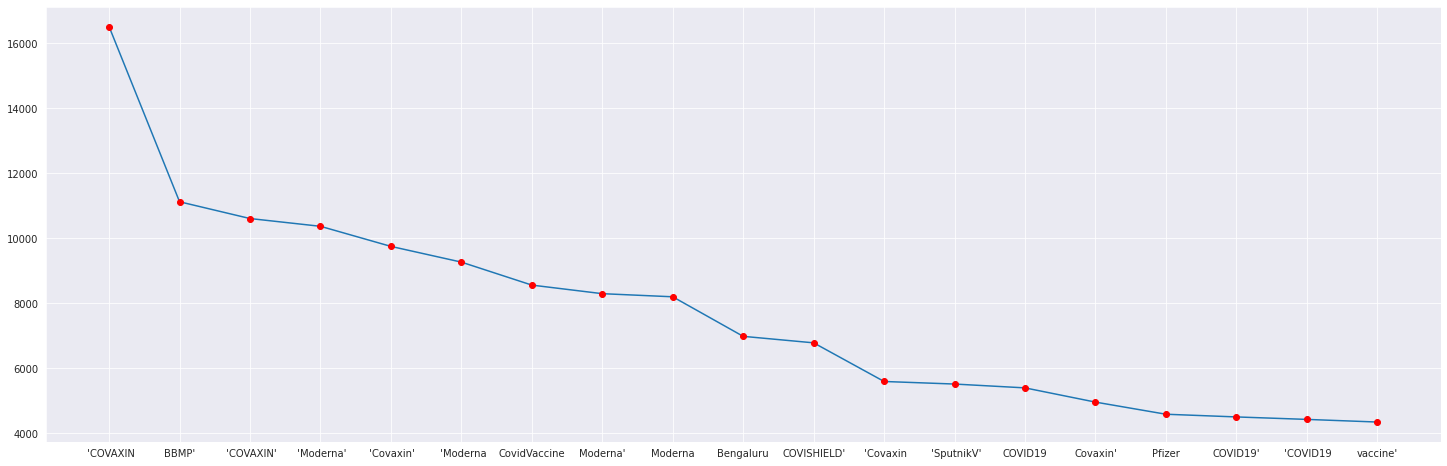

In [ ]:
x_val = [x[0] for x in top_common_hashtags]
y_val = [x[1] for x in top_common_hashtags]
plt.figure(figsize=(25,8))
# print x_val
plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

In [ ]:
hashtags_by_date= tweets_df.groupby('month/year', sort=False)['Hashtags_Cnt'].sum().reset_index(name='Number of Hashtags')

# **Number of Hashtags in Each Month**

In [ ]:
px.line(hashtags_by_date, x='month/year', y='Number of Hashtags', title='COVID-19 Vaccines Hashtags Trend')

# **Senitment Analysis**

## **Text Cleaning**

In [ ]:
def cleaning(tweet):
  tweet=str(tweet)
  tweet=nt.remove_urls(tweet)
  tweet=nt.remove_userhandles(tweet)
  tweet=nt.remove_special_characters(tweet)
  tweet=nt.remove_numbers(tweet)
  tweet=nt.remove_accents(tweet)
  tweet = re.sub(r'#', '', tweet)
  return tweet
  # print(tweet)

In [ ]:
#in this step we remove just userhandldes, urls, special characters , numbers and hashtags. Because we are applying sentiment analysis
#removal of stop words will affect sentiment in the sentence. Therefore, we did not remove stop words

In [ ]:
tweets_df['cleaned_text']=tweets_df['text'].apply(lambda x:cleaning(x))

In [ ]:
tweets_by_date1= tweets_df.groupby('month/year', sort=False)['cleaned_text'].size().reset_index(name='Number of Cleaned Tweets')

# tweets_by_date1['month/year']=tweets_by_date1['month/year'].apply(lambda x:int(x))


# **Aspect Based Sentiment Analysis**

In [ ]:
import spacy   #premium NLP package
nlp=spacy.load("en_core_web_sm")

In [ ]:
def ABSA(text):
		doc=nlp(text)
		descriptive_term = ''
		target = ''
		for token in doc:
			if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
				target = token.text
			if token.pos_ == 'ADJ':
				prepend = ''
				for child in token.children:
					if child.pos_ != 'ADV':
						continue
					prepend += child.text + ' '
					descriptive_term = prepend + token.text
		return target+" "+descriptive_term

In [ ]:
tweets_df['Aspects']=tweets_df['cleaned_text'][0:1000].apply(lambda x:ABSA(x))

## **Senitments**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer   #NLTK packahe for sentiment analysis
sent_anal_obj=SentimentIntensityAnalyzer()

In [ ]:
def sentiment_tag(polarity):
    if polarity >= 0.05 :
        return "Positive"
    elif polarity <= - 0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
def sentiment_score(my_text):
  sentimnent_dict=sent_anal_obj.polarity_scores(str(my_text))
  return sentimnent_dict['compound']


In [ ]:
tweets_df['Sentiment_Score']=tweets_df['cleaned_text'].apply(lambda x:sentiment_score(x))

In [ ]:
tweets_df['Sentiment_Tag']=tweets_df['Sentiment_Score'].apply(lambda x:sentiment_tag(x))

# **Sentiments Distribtution**

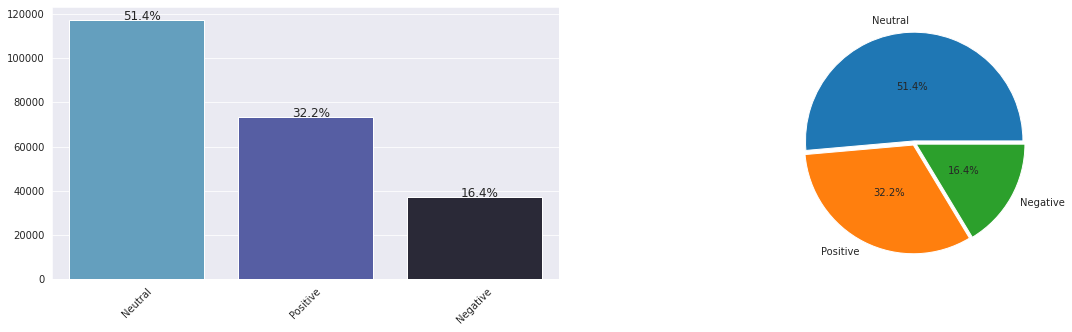

In [ ]:
make_plots(tweets_df['Sentiment_Tag'])

In [ ]:
tweets_df.date = pd.to_datetime(tweets_df.date).dt.date

In [ ]:
hashtags_each_month=tweets_df.groupby('month/year')['Hashtags'].apply(','.join).reset_index(name='Monthly Hashtags')

In [ ]:
def top_hashtags_each_month(hashtags):
  f=Counter(hashtags.split(",")).most_common(2)
  return f

In [ ]:
hashtags_each_month['Top Hashtags by Each Month']=hashtags_each_month['Monthly Hashtags'].apply(lambda x:top_hashtags_each_month(x))

In [ ]:
hashtags_each_month['Top Hashtags by Each Month']

0      [(PfizerBioNTech, 1573), (, 783)]
1            [(, 4473), (Moderna, 2982)]
2     [(Covaxin, 2801), (Moderna, 2710)]
3       [(PfizerBioNTech, 956), (, 489)]
4            [(, 2018), (Moderna, 1799)]
5            [(, 5912), (Moderna, 4841)]
6            [(Moderna, 5742), (, 5503)]
7            [(, 3727), (Covaxin, 3064)]
8       [(COVAXIN, 10257), (BBMP, 6605)]
9       [(COVAXIN, 11171), (BBMP, 5091)]
10           [(, 7882), (Moderna, 5509)]
11           [(, 6445), (Moderna, 2141)]
Name: Top Hashtags by Each Month, dtype: object

In [ ]:
hashtags_each_month['Top Hashtags of  Month']=hashtags_each_month['Top Hashtags by Each Month'].apply(lambda x:[i[0] for i in x])
hashtags_each_month['Top Hashtags by Each Month Cnt']=hashtags_each_month['Top Hashtags by Each Month'].apply(lambda x:[i[1] for i in x])
# hashtags_each_month['Top Hashtags by Each Month Cnt']=hashtags_each_month['Top Hashtags by Each Month'].apply(lambda x:[i[0] for i in x])

In [ ]:
hashtags_each_month['Top Hashtags by Each Month Cnt']=hashtags_each_month['Top Hashtags by Each Month Cnt'].apply(lambda x:str(x).split(",")[0])

In [ ]:
hashtags_each_month['Top Hashtags of  Month']=hashtags_each_month['Top Hashtags of  Month'].apply(lambda x:nt.remove_special_characters(str(x)))

In [ ]:
hashtags_each_month['Top Hashtags by Each Month Cnt']=hashtags_each_month['Top Hashtags by Each Month Cnt'].apply(lambda x: nt.remove_special_characters(str(x)))

# **Top Hashtag of Each Month--- Hashtags Trends**

In [ ]:
px.line(hashtags_each_month, x='month/year', y=['Top Hashtags of  Month'], title='COVID-19 Vaccines Hashtags Trend')

# **Senitments Trends**

In [ ]:
sentiments_trend = tweets_df[['user_name', 'date', 'Sentiment_Tag']].groupby(['date', 'Sentiment_Tag']).count().reset_index()
sentiments_trend.columns = ['date', 'Sentiment', 'counts']


In [ ]:
px.line(sentiments_trend, x='date', y=['counts','Sentiment'], color='Sentiment', title='COVID-19 Vaccines Sentiment Analysis')

# **Emotions Analysis**

### **using huggign face transformers model for emotions detection**

In [ ]:
! pip install transformers -q
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 69.0 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 50.3 MB/s 


Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
tweets_df['Emotions']=tweets_df['cleaned_text'][0:1000].apply(emotion)

In [ ]:
def extract_em(em_dict):
  return em_dict[0]['label'] 
  # print(em_dict[0]['label'])


In [ ]:
tweets_df['Emotions_Label']=tweets_df['Emotions'][0:100].apply(lambda x:extract_em(x))

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
hashtags_tokens=[]

In [ ]:
def toknize_hashtags(hashtags):
  hashtags_tokens=[]
  hashtags=hashtags.lower()
  doc=nlp(hashtags)
  for token in doc:
    hashtags_tokens.append(token.text)
  return hashtags_tokens


In [ ]:
tweets_df['Hashtags']=tweets_df['Hashtags'].apply(lambda x:' '.join(toknize_hashtags(str(x))))

# **Final Output**

In [ ]:
tweets_df[["text","Aspects","Emotions_Label","Sentiment_Tag","Hashtags"]].head(10)

,text,Aspects,Emotions_Label,Sentiment_Tag,Hashtags
0,Same folks said daikon paste could treat a cyt...,paste,neutral,Positive,pfizerbiontech
1,While the world has been on the wrong side of ...,world,optimism,Negative,
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,,neutral,Positive,"coronavirus , sputnikv , astrazeneca , pfizerb..."
3,"Facts are immutable, Senator, even when you're...",Facts ethically enough sturdy,neutral,Neutral,
4,Explain to me again why we need a vaccine @Bor...,,curiosity,Neutral,"whereareallthesickpeople , pfizerbiontech"
5,Does anyone have any useful advice/guidance fo...,vaccine,curiosity,Positive,
6,it is a bit sad to claim the fame for success ...,,sadness,Positive,vaccination
7,There have not been many bright days in 2020 b...,,admiration,Positive,"bidenharris , election2020"
8,Covid vaccine; You getting it?\n\n #CovidVacci...,,neutral,Neutral,"covidvaccine , covid19,pfizerbiontech , moderna"
9,#CovidVaccine \n\nStates will start getting #C...,,neutral,Neutral,"covidvaccine , covid19vaccine , us , pakustv ,..."


In [ ]:
em_by_date= tweets_df.groupby('month/year', sort=False)['Emotions_Label'].size().reset_index(name='Number of Emotions')


In [ ]:
positive_sents=tweets_df[tweets_df['Sentiment_Tag']=='Positive']
negative_sents=tweets_df[tweets_df['Sentiment_Tag']=='Negative']
netural_sents=tweets_df[tweets_df['Sentiment_Tag']=='Neutral']


In [ ]:
positive_sents_by_date= positive_sents.groupby('month/year', sort=False)['Sentiment_Tag'].size().reset_index(name='Positive Sentiments')
negative_sents_by_date= negative_sents.groupby('month/year', sort=False)['Sentiment_Tag'].size().reset_index(name='Negative Sentiments')
netural_sents_by_date= netural_sents.groupby('month/year', sort=False)['Sentiment_Tag'].size().reset_index(name='Neutral Sentiments')

In [ ]:
all_sents_by_date=pd.concat([positive_sents_by_date,negative_sents_by_date['Negative Sentiments'],netural_sents_by_date['Neutral Sentiments'],hashtags_each_month['Top Hashtags of  Month'],hashtags_each_month['Top Hashtags by Each Month Cnt']],axis=1)

In [ ]:
all_sents_by_date['Top Hashtags by Each Month Cnt']=all_sents_by_date['Top Hashtags by Each Month Cnt'].apply(lambda x: (int(x)/2))

## **Sentiments and Hashtags Frequency Trends : Alert ---- Please mulitply 'Top Hashtags' with 2 for real value for hashtags Counts**

In [ ]:
px.line(all_sents_by_date,x='month/year',y=['Positive Sentiments','Neutral Sentiments','Negative Sentiments','Top Hashtags by Each Month Cnt'])